In [67]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [213]:
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-in-7-Days/master/Section%202/height-weight.csv'
raw_height_weight_data = requests.get(url)
raw1_hw = [measurement.split(',') for measurement in raw_height_weight_data.text.split('\n')]
del raw1_hw[-1]
# [item for sublist in raw1_hw for item in sublist]
line_float=[]
height_weight_data = []
for line in raw1_hw:
    for i in [0,1]:
#         try:
        measurement = float(line[i])
        line_float.append(measurement)
#         except ValueError:
#             print("error on line",line)
    height_weight_data.append(line_float)
height_weight_data_1 = height_weight_data[0]

In [183]:
h_w_data = [height_weight_data_1[i:i+2] for i in range(0,len(height_weight_data_1),2)]
# h_w_data_1 = np.asarray(height_weight_data_1).reshape(-1,2) #the same as line above 
data = np.asarray(h_w_data)
#converting to SI units
data[:,0]=data[:,0]*2.54
data[:,1]=data[:,1]*0.4536

array([[187.57142323, 109.72292027],
       [174.70603629,  73.62403033],
       [188.23966769,  96.4992521 ],
       [182.19668514,  99.81126453],
       [177.49976148,  93.60026955],
       [170.82265985,  69.04343387],
       [174.71410638,  83.42969027],
       [173.6052294 ,  76.19169572],
       [170.22813214,  79.80159417],
       [161.17949471,  70.94289322]])

In [184]:
X = data[:,0]
y = data[:,1]

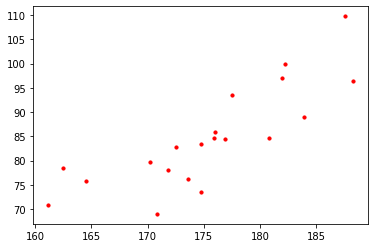

In [185]:
X_20 = X[:20]
y_20 = y[:20]
plt.scatter(X_20, y_20, color='red', s=10) ## s -- marker size

In [248]:
#Splitting data into train and test sets ( 80% / 20% ) and reshaping the data to input into sklearn
X_train = X[:4500].reshape(-1,1)
y_train = y[:4500]
X_test = X[4500:].reshape(-1,1)
y_test = y[4500:]

In [249]:
#instantiating linear regression model
regr = linear_model.LinearRegression()

In [250]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [252]:
# The coefficients
np.set_printoptions(precision=2)
print('Slope: {}\nInterception: {:.2f}\n'.format(regr.coef_, regr.intercept_))

Slope: [1.06]
Interception: -101.34



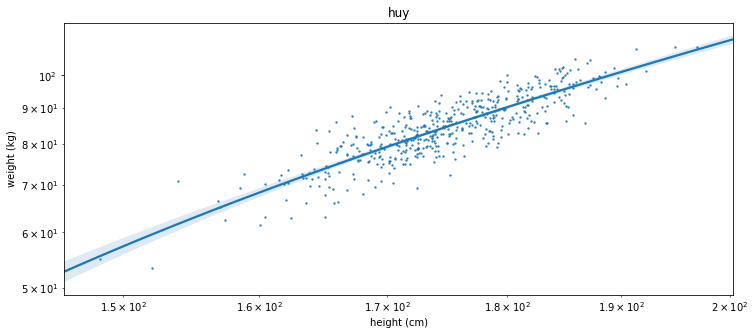

In [254]:
# Plot outputs
fig, ax = plt.subplots(figsize=(12,5))
ax.set(title='huy', xlabel='height (cm)', ylabel='weight (kg)', xscale = 'log', yscale = 'log')
sns.regplot(X_test.reshape(-1,), y_test, scatter_kws={'s':2})

# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [256]:
mean_squared_error(y_test, y_pred)
regr.score(X_test,y_test)

0.7421603067254926